# __Data Science Blog Post__

## __Business Understanding__

The issues in concern for Athens using the Airbnb related info:
- The usage of the platform for travelers
- The effect that pandemic had in the properties listed in Athens through the platform
- The dispersion of available properties in the city



## __Data Understanding__

In [250]:
# Import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns  
import folium
from folium.plugins import HeatMap

# Gather Data
# Source: http://insideairbnb.com/get-the-data.html

df_list_sum_2007 = pd.read_csv('./Data/listings_sum_2007.csv')
df_list_sum_1907 = pd.read_csv('./Data/listings_sum_1907.csv')
df_list_sum_1807 = pd.read_csv('./Data/listings_sum_1807.csv')
df_list_sum_1507 = pd.read_csv('./Data/listings_sum_1507.csv')

df_list_2007 = pd.read_csv('./Data/listings_2007.csv',low_memory=False)
df_list_1907 = pd.read_csv('./Data/listings_1907.csv',low_memory=False)
df_list_1807 = pd.read_csv('./Data/listings_1807.csv',low_memory=False)
df_list_1507 = pd.read_csv('./Data/listings_1507.csv',low_memory=False)

df_cal_2007 = pd.read_csv('./Data/calendar_2007.csv.gz')

df_rev_2007 = pd.read_csv('./Data/reviews_2007.csv')

df_neighb = pd.read_csv('./Data/neighbourhoods_.csv')

In [251]:
class clr:
   """
   Define text fromatting.
   """ 

   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pd.options.display.float_format = "{:.0f}".format

def prnt_bld(txt,val):
    """
    Print formatted text.
    
    Parameters: 
    txt (str): Text
    val (int): Value
  
    Returns: 
    int: Description of return value 
    """
    
    print(clr.BOLD+"\n" + txt + clr.END , val) 
    return   

In [252]:
def explore_df(df):
    """
    Inspect the dataset in various aspects
    
    Parameter:
    df(dataframe): dataset
    """
    
    prnt_bld("No of Columns: ", df.shape[1])
    prnt_bld("No of Rows: ", df.shape[0])
    prnt_bld("Available Columns: ", df.columns)
    prnt_bld("Columns with Null Values: ", set(df.columns[df.isnull().mean()==0]))#set of columns with no missing values.
    prnt_bld("Columns with more than 50% NaN: ", set(df.columns[df.isnull().mean()>.5])) #set of columns with more than 50% of the values missing
    return

In [253]:
# Accessing Data
# Exploring the reviews data
explore_df(df_rev_2007)


No of Columns:  2

No of Rows:  393114

Available Columns:  Index(['listing_id', 'date'], dtype='object')

Columns with Null Values:  {'listing_id', 'date'}

Columns with more than 50% NaN:  set()


In [254]:
df_rev_2007.head(3)

,listing_id,date
0,10595,2011-05-20
1,10595,2012-08-15
2,10595,2013-05-20


In [255]:
# Exploring the summary listings data
explore_df(df_list_sum_2007)


No of Columns:  16

No of Rows:  11238

Available Columns:  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Columns with Null Values:  {'room_type', 'id', 'minimum_nights', 'host_id', 'neighbourhood', 'number_of_reviews', 'calculated_host_listings_count', 'longitude', 'availability_365', 'price', 'latitude'}

Columns with more than 50% NaN:  {'neighbourhood_group'}


<AxesSubplot:>

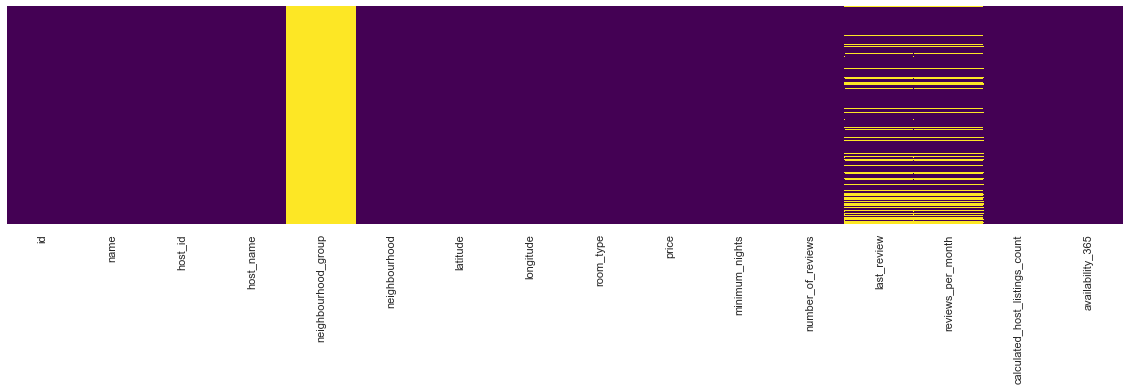

In [256]:
# Checking where the most null values reside
sns.set(rc={'figure.figsize':(20,4)})

sns.heatmap(df_list_sum_2007.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [257]:
# Viewing more meaningfill categorical and numerical columns 
# -- neighbourhood_group should be dropped
# -- host identification data are of no use
df_list_sum_2007.drop(columns=['name','host_id','host_name','neighbourhood_group','latitude','longitude']).head(3) 

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,63,1,25,2020-03-15,0,6,356
1,10990,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,39,1,36,2020-07-14,0,6,246
2,10993,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,39,1,48,2020-01-17,0,6,345


In [258]:
# High Level check of statictics for July 2020 and July 2019
df_list_sum_2007.drop(columns=['id','name','host_id','host_name','neighbourhood_group','latitude','longitude']).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11238,11238,11238,8525,11238,11238
mean,70,4,35,2,10,237
std,283,22,61,2,22,132
min,8,1,0,0,1,0
25%,32,1,1,0,1,135
50%,46,2,8,1,2,294
75%,70,2,42,2,7,358
max,21814,1000,711,13,139,365


In [259]:
df_list_sum_1907.drop(columns=['id','name','host_id','host_name','neighbourhood_group','latitude','longitude']).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11047,11047,11047,8488,11047,11047
mean,65,4,31,2,10,228
std,147,19,55,2,22,119
min,0,1,0,0,1,0
25%,33,1,1,1,1,136
50%,47,2,8,2,2,267
75%,70,2,35,3,6,335
max,7000,1000,654,16,127,365


In [260]:
# Exploring the listings data
explore_df(df_list_2007)


No of Columns:  101

No of Rows:  11238

Available Columns:  Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       ...
       'requires_license', 'jurisdiction_names', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=101)

Columns with Null Values:  {'accommodates', 'calculated_host_listings_count_entire_homes', 'host_verifications', 'id', 'has_availability', 'calculated_host_listings_count_shared_rooms', 'last_scraped', 'longitude', 'host_url', 'availability_90', 'listing_url', 'neighbourhood_cleansed', 'availability_365', 'availability_30', 'number_of_reviews_ltm', 'maximum_maximum_nights

In [261]:
# Allow display off all columns (to check if any of the columns is usefull)

pd.set_option('display.max_columns', df_list_2007.shape[1]) 
df_list_2007.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,summary,space,experiences_offered,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,xl_picture_url,street,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,bed_type,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,requires_license,jurisdiction_names,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20200721050213,2020-07-28,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://z0.muscache.cn/im/pictures/f7e19a44-5a...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6,6,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Ambelokipi,ΑΜΠΕΛΟΚΗΠΟΙ,nan,38,24,Apartment,Entire home/apt,8,2,Athens Furnished Apartment No6 is 3-bedroom ap...,Athens Furnished Apartment No6 is an excellent...,none,Although is very easy to come from the airport...,Note: 5-day ticket for all the public transpor...,Guest have access to all amenities in the apar...,-Our reception is 10 meters away from the entr...,"- Parties, meetings, appointments or invite pe...",nan,nan,nan,"Athens, Attica, Greece",Athens,Attica,11526,Athens,"Athens, Greece",GR,Greece,t,Real Bed,1076,$700.00,"$2,800.00",$0.00,$25.00,4,$8.00,1,4,45,45,1,45,2 months ago,t,21,51,81,356,2020-07-28,25,4,nan,2011-05-20,2020-03-15,97,10,10,10,10,9,10,478825,t,6,t,nan,f,moderate,f,f,6,0,0,0
1,10990,https://www.airbnb.com/rooms/10990,20200721050213,2020-07-27,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/im/pictures/8645179/c1...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6,6,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Ambelokipi,ΑΜΠΕΛΟΚΗΠΟΙ,nan,38,24,Apartment,Entire home/apt,4,1,Athens Quality Apartments - Deluxe apartment i...,Athens Furnished Apartment No3 is an excellent...,none,NaN,Note: 5-day ticket for all the public transpor...,NaN,NaN,"- Parties, meetings, appointments or invite pe...",nan,nan,nan,"Athens, Attica, Greece",Athens,Attica,11526,Athens,"Athens, Greece",GR,Greece,t,Real Bed,nan,

In [262]:
# Exploring the calendar data
explore_df(df_cal_2007)


No of Columns:  7

No of Rows:  4101893

Available Columns:  Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

Columns with Null Values:  {'listing_id', 'price', 'available', 'date', 'adjusted_price'}

Columns with more than 50% NaN:  set()


In [263]:
df_cal_2007.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,48635,2020-07-21,t,$25.00,$25.00,1,35
1,10595,2020-07-28,f,$40.00,$36.00,2,45
2,10595,2020-07-29,f,$40.00,$36.00,2,45


## __Prepare Data__

In [264]:
# Arrange date field 
df_rev_2007.date = pd.to_datetime(df_rev_2007.date, format="%Y-%m-%d")

In [265]:
# Fixing the price,  adjusted_price and date columns
df_cal_2007['price'] = df_cal_2007.price.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')
df_cal_2007['adjusted_price'] = df_cal_2007.adjusted_price.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')
df_cal_2007.date = pd.to_datetime(df_cal_2007.date, format="%Y-%m-%d")

df_cal_2007.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,48635,2020-07-21,t,25,25,1,35
1,10595,2020-07-28,f,40,36,2,45
2,10595,2020-07-29,f,40,36,2,45


## __Data Modeling__

### The usage of the platform for travelers

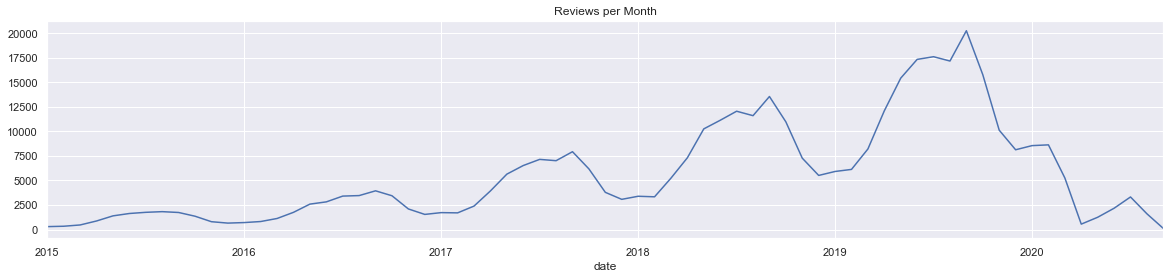

In [266]:
# Analyse Data 
# Filtering Reviews data, grouping by month
df_rev_2007['Reviews'] = 1 # Adding a column to count entries

df_reviews = df_rev_2007[df_rev_2007["date"].isin(pd.date_range('2015-01-01', '2020-12-31'))] # Providing date range
reviews = df_reviews.groupby(pd.Grouper(key='date',freq='M')).sum()  # Grouping by month
reviews = reviews.resample('M').asfreq().fillna(0)

# Visualize
reviews['Reviews'].plot(kind="line");  #Plotting
plt.title('Reviews per Month');
plt.show()

sns.set(rc={'figure.figsize':(6,4)})

In [267]:
# Check if an Airbnb listing is available to be booked or not. 
# If a listing is not available for booking, we can assume it is either being booked or not made available to be booked.

df_cal_2007_av = df_cal_2007.query('available=="f"')
df_cal_2007_av = df_cal_2007.query('available=="f"')
df_cal = df_cal_2007_av[['date','listing_id','available']].copy()
df_cal['available'] = 1
df_cal.head(3)

,date,listing_id,available
1,2020-07-28,10595,1
2,2020-07-29,10595,1
3,2020-07-30,10595,1


In [268]:
# Summarise calendar data 
plot_cal = df_cal.groupby(pd.Grouper(key='date',freq='M')).sum()  
plot_cal = plot_cal.resample('M').asfreq().fillna(0)
plot_cal.head(3)

,listing_id,available
date,,
2020-07-31,1114376678667,41005
2020-08-31,2829795824548,105977
2020-09-30,2532550700660,95535


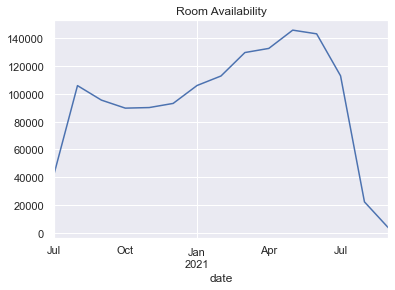

In [269]:
# Visualize
plot_cal['available'].plot(kind="line");
plt.title('Room Availability');
plt.show()

### The effect that pandemic had in the properties listed in Athens through the platform

In [270]:
def dist_bar(df, dist_value, title, top):
    """
    Ploting Distinct Values.
    
    Parameters: 
    df (dataframe): dataset
    dist_value (str): field to be counted 
    title (str): title 
    top (int): top no 
    """
    
    dist= df[dist_value].value_counts()[:top]
    dist[:10].plot(kind="bar");
    plt.title(title);
    plt.show()
    return

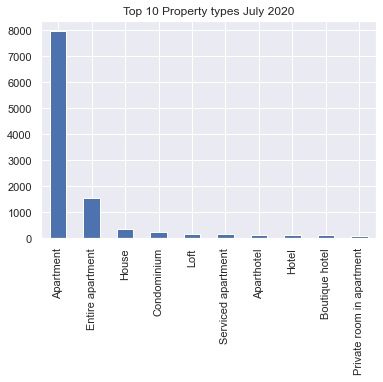

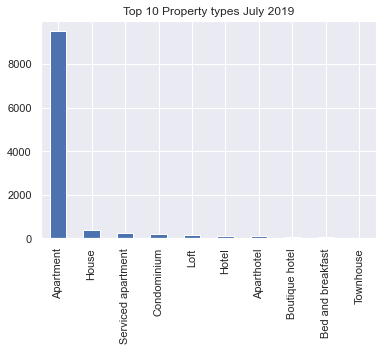

In [271]:
# Visualize
# Viewing property types that appear the most for 2020
dist_bar(df_list_2007,'property_type',"Top 10 Property types July 2020",10)
# Viewing property types that appear the most for 2019
dist_bar(df_list_1907,'property_type',"Top 10 Property types July 2019",10)

In [272]:
df_list_2007['property_type'].value_counts()[:2]

Apartment           7963
Entire apartment    1537
Name: property_type, dtype: int64

In [273]:
## The property types have similar counts for both years, except that for apartments in 2020 there is a breakdon in values between Apartment and Entire Apartment
print('Total Apartments:',7963+1537)
df_list_1907['property_type'].value_counts()[:1]

Total Apartments: 9500


Apartment    9502
Name: property_type, dtype: int64

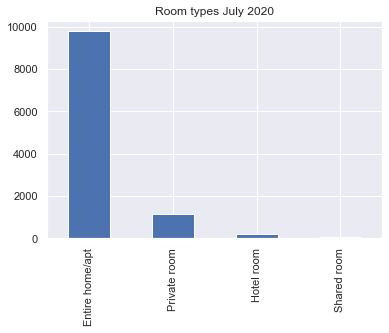

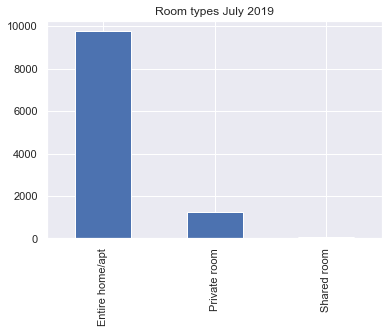

In [274]:
# Visualize
# Viewing room types for 2020
dist_bar(df_list_2007,'room_type',"Room types July 2020",10)

# Viewing room types for 2020
dist_bar(df_list_1907,'room_type',"Room types July 2019",10)

In [275]:
# Viewing room types for 2019
df_list_1907['room_type'].value_counts()

Entire home/apt    9755
Private room       1238
Shared room          54
Name: room_type, dtype: int64

In [276]:
# Viewing room types for 2020
df_list_2007['room_type'].value_counts()

Entire home/apt    9785
Private room       1163
Hotel room          208
Shared room          82
Name: room_type, dtype: int64

In [277]:
## In 2020 there is a small increase in Entire home/apt and Shared rooms while a new type Hotel rooms has been indroduced, 
## while private rooms have been decreased (probaly because hote rooms were previously marked as private rooms)

In [278]:
## Checking summary data for past years

# Define the dates that correspond to datasets used
dates=['Jul-2015','Jul-2018','Jul-2019','Jul-2020']

# Define a list of number of available listings for available month/years
listings=[df_list_sum_1507.shape[0],df_list_sum_1807.shape[0],df_list_sum_1907.shape[0],df_list_sum_2007.shape[0]]

# Define a list of listings for average price for available month/years
prices=[df_list_sum_1507['price'].mean(),df_list_sum_1807['price'].mean(),df_list_sum_1907['price'].mean(),df_list_sum_2007['price'].mean()]


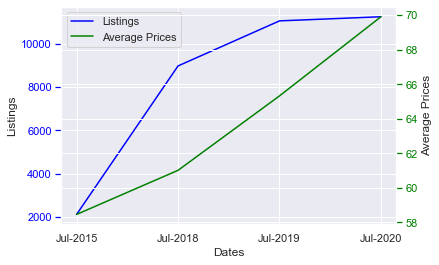

In [279]:
# Visualize
# Plot a graph with the number of listings and the average price over time 
base, host = plt.subplots()

par1 = host.twinx()


p1, = host.plot(dates,listings,label='Listings',color='blue')
p2, = par1.plot(dates,prices,label='Average Prices',color='green')

host.set_xlabel("Dates")
host.set_ylabel("Listings")
par1.set_ylabel("Average Prices")

host.tick_params(axis='y', colors='blue')
par1.tick_params(axis='y', colors='green')


lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

## July 2020 appears to have a small increase in Listings and Average Prices 

### The dispersion of available properties in the city

In [280]:
# Available neighbourhoods
print("No of neighbourhoods: ", df_neighb.shape[0])

No of neighbourhoods:  45


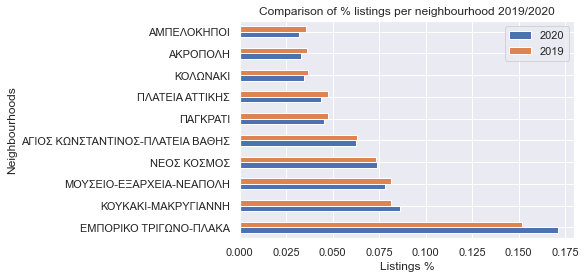

In [281]:
# Series of the listings counts for each neighbourhood
neighb_20 = df_list_sum_2007.neighbourhood.value_counts() 
neighb_19 = df_list_sum_1907.neighbourhood.value_counts() 

# Find proportion of listings of each neighbourhood
neighb_perc_20 = neighb_20[:10]/neighb_20.sum()
neighb_perc_19 = neighb_19[:10]/neighb_19.sum()

neighb_perc_20.to_frame()
neighb_perc_19.to_frame()

neighb = pd.concat([neighb_perc_20,neighb_perc_19], axis=1, join='inner')

# Visualize
neighb[:10].plot(kind="barh")
plt.xlabel('Listings %')
plt.ylabel('Neighbourhoods')
plt.title("Comparison of % listings per neighbourhood 2019/2020");
plt.legend(['2020', '2019'])
plt.show()

In [282]:
# Concentration of listings in the neigbourhoods

x=6
x1=neighb_20[:x].sum()/neighb_20.sum()*100
x2=x/neighb_20.shape[0]*100
print("More than {:.1f}% of all listings come from {:.1f}% of the neigbourhoods".format(x1,x2))


More than 51.8% of all listings come from 13.3% of the neigbourhoods


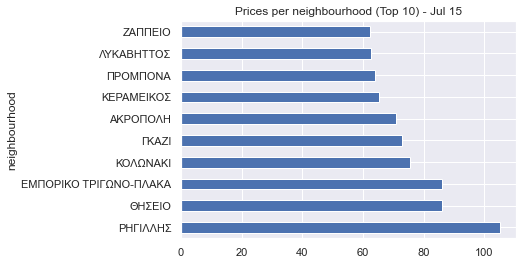

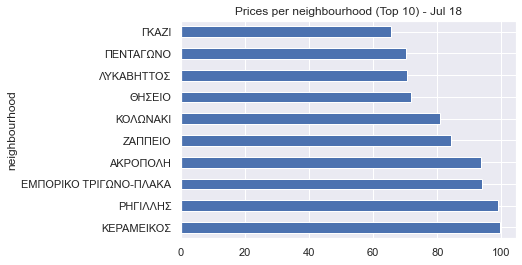

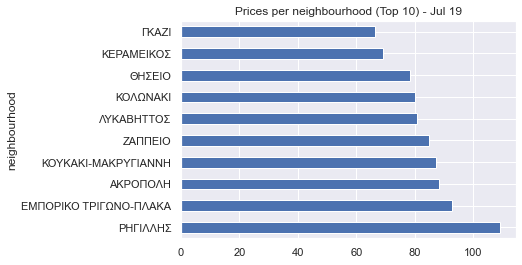

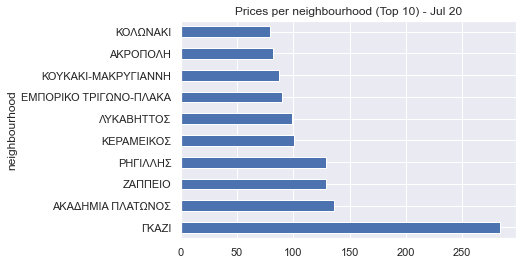

In [283]:
def neigh_bar(df, sort, title):
    """
    Plot average price per neighbourhood for the most expensive neighbourhoods each year.
    
    Parameters:
    df (dataframe): dataset
    sort (bool): sort type
    title (str): title     
    """
    
    neighb = df.groupby(['neighbourhood']).mean()['price'].sort_values(ascending=sort)
    neighb[:10].plot(kind="barh");
    plt.title(title);
    plt.show()
    return

# Visualize
neigh_bar(df_list_sum_1507, False, "Prices per neighbourhood (Top 10) - Jul 15")
neigh_bar(df_list_sum_1807, False, "Prices per neighbourhood (Top 10) - Jul 18")
neigh_bar(df_list_sum_1907, False, "Prices per neighbourhood (Top 10) - Jul 19")
neigh_bar(df_list_sum_2007, False, "Prices per neighbourhood (Top 10) - Jul 20")


In [284]:
# Most expensive neighbourhoods 2020
neighb = df_list_sum_2007.groupby(['neighbourhood']).mean()['price'].sort_values(ascending=False)

neighb[:10]

neighbourhood
ΓΚΑΖΙ                    283
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ        137
ΖΑΠΠΕΙΟ                  129
ΡΗΓΙΛΛΗΣ                 129
ΚΕΡΑΜΕΙΚΟΣ               100
ΛΥΚΑΒΗΤΤΟΣ                99
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    90
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ       87
ΑΚΡΟΠΟΛΗ                  82
ΚΟΛΩΝΑΚΙ                  79
Name: price, dtype: float64

In [285]:
most_expensive = ['ΓΚΑΖΙ',
'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ',
'ΖΑΠΠΕΙΟ',
'ΡΗΓΙΛΛΗΣ',
'ΚΕΡΑΜΕΙΚΟΣ',
'ΛΥΚΑΒΗΤΤΟΣ',
'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ',
'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ',
'ΑΚΡΟΠΟΛΗ',
'ΚΟΛΩΝΑΚΙ']

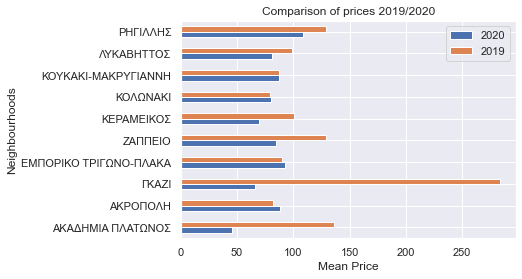

In [286]:
# Plot average price per neighbourhood based on 2020 most expensive areas
neighb_pr_20 = df_list_sum_1907[df_list_sum_1907['neighbourhood'].isin(most_expensive)].groupby(['neighbourhood']).mean()['price']
neighb_pr_19 = df_list_sum_2007[df_list_sum_2007['neighbourhood'].isin(most_expensive)].groupby(['neighbourhood']).mean()['price']

neighb_pr = pd.merge(left=neighb_pr_20, right=neighb_pr_19, left_on='neighbourhood', right_on='neighbourhood')

# Visualize
neighb_pr[:10].plot(kind="barh")
plt.xlabel('Mean Price')
plt.ylabel('Neighbourhoods')
plt.title("Comparison of prices 2019/2020");
plt.legend(['2020', '2019'])
plt.show()

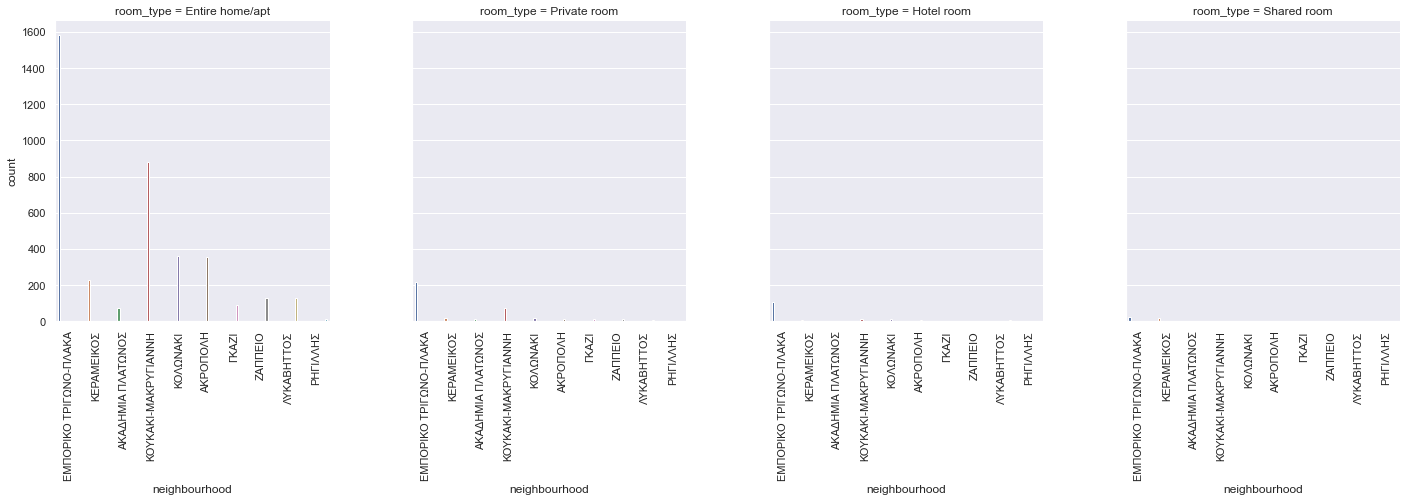

In [287]:
# Room types in the most expensive neigbourhoods
df_list_top = df_list_sum_2007[df_list_sum_2007['neighbourhood'].isin(most_expensive)]

# Visualize
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood', col='room_type', data=df_list_top, kind='count')
viz_3.set_xticklabels(rotation=90)

In [288]:
def foli_map(df):
    """
    Plot map of listings in neighbourhoods.
    
    Parameters:
    df (dataframe): dataset   
    """
    
    m=folium.Map([37.98,23.72],zoom_start=12)
    m2=folium.Map([37.98,23.72],zoom_start=12)
    HeatMap(df[['latitude','longitude']].dropna(),radius=9,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
    display(m)
    return

# Visualize
foli_map(df_list_sum_2007)
foli_map(df_list_sum_1907)   

# __Evaluation of the Results__

We analyzed the data to understand, in high level, the implication that the pandemic had on properties, airbnb users and the communities. 
Based on the fact that tourism in Athens had a huge increase during past year, the pandemic seems to have ceased further development and it remains to see how the coronavirus will be tackled in the near future, in order to recognize if the impact that is bringing in the tourist industry is permanent or not.

__GitHub Repository__ https://github.com/ppapazaf1/-Data-Science-Blog-Post.git

__Medium Post__ https://medium.com/@panagiotis.papazafeiropoulos/athens-and-airbnb-in-the-pandemic-era-87f05def1ca0